In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

# 1. 시별로 인구 비교(거주,근무, 방문)

In [139]:
df = pd.read_csv('jeju.csv' , encoding="cp949")
df = df[df['시도명'] == '제주시']

In [140]:
# people = df[['읍면동명', '거주인구', '근무인구', '방문인구', '총 유동인구']]

# df = people.groupby('읍면동명').mean().astype(int)

In [141]:
max_val = df['거주인구'].max()+100000
min_val = df['거주인구'].min()

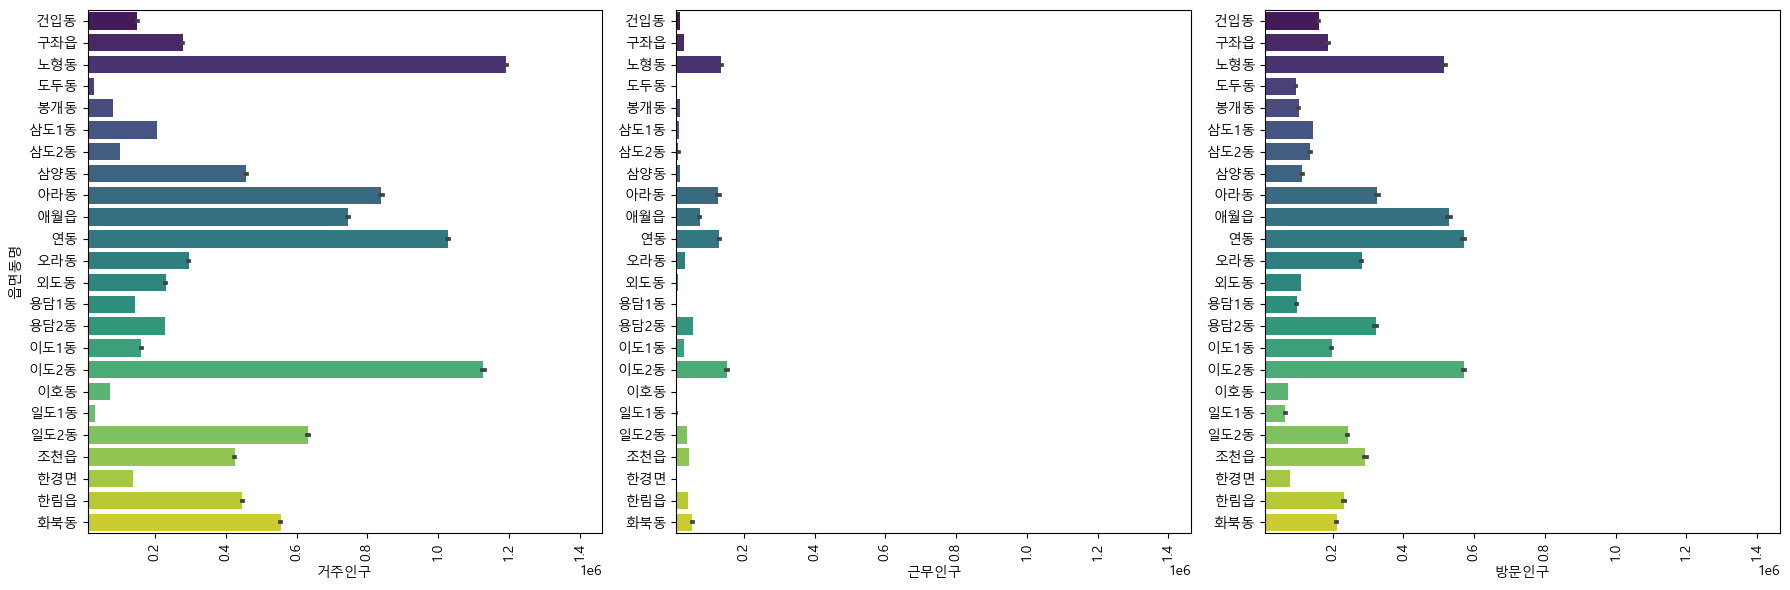

In [142]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))


# 거주인구
sns.barplot(ax=axes[0], data=df, x='거주인구', y='읍면동명', palette='viridis')
# axes[0].set_title('거주인구')
axes[0].set_xlabel('거주인구')
axes[0].set_ylabel('읍면동명')
axes[0].set(xlim=(min_val, max_val))
axes[0].tick_params(axis='x', rotation=90)


# 근무인구
sns.barplot(ax=axes[1], data=df, x='근무인구', y='읍면동명', palette='viridis')
# axes[1].set_title('근무인구')
axes[1].set_xlabel('근무인구')
# axes[1].set_ylabel('읍면동명')
axes[1].set_ylabel('')
axes[1].set(xlim=(min_val, max_val))
axes[1].tick_params(axis='x', rotation=90)


# 방문인구
sns.barplot(ax=axes[2], data=df, x='방문인구', y='읍면동명', palette='viridis')
# axes[2].set_title('방문인구')
axes[2].set_xlabel('방문인구')
axes[2].set_ylabel('')
axes[2].set(xlim=(min_val, max_val))
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# 2. 시별로 평균 교통량

In [143]:
df = pd.read_csv('jeju.csv', encoding='cp949')
df2 = pd.read_csv('jeju.csv', encoding='cp949')
df = df[df['시도명']=='제주시']

In [144]:
df.head(3) #len: 19221

,일자,시도명,읍면동명,거주인구,근무인구,방문인구,총 유동인구,교통량,평균 속도,평균 소요 시간,평균 기온,일강수량,평균 풍속,데이터기준일자
12848,2018-01-01,제주시,건입동,174544.301,19772.091,191560.904,385877.295,393.4,33.6,43.4,0.8,0.0,2.6,2020-12-15
12849,2018-01-02,제주시,건입동,166314.614,26391.276,163786.671,356492.561,471.2,32.0,46.6,1.0,0.0,1.5,2020-12-15
12850,2018-01-03,제주시,건입동,165105.830,25732.876,156549.258,347387.964,450.6,32.0,44.8,0.0,0.0,3.4,2020-12-15


In [145]:
df['읍면동명'].unique()

array(['건입동', '구좌읍', '노형동', '도두동', '봉개동', '삼도1동', '삼도2동', '삼양동', '아라동',
       '애월읍', '연동', '오라동', '외도동', '용담1동', '용담2동', '이도1동', '이도2동', '이호동',
       '일도1동', '일도2동', '조천읍', '한경면', '한림읍', '화북동'], dtype=object)

In [146]:
# temp = df[df['읍면동명']=='이호동']
# temp['교통량'].mean()

In [147]:
temp = df[df['읍면동명']=='도두동']
print(temp['평균 소요 시간'].mean())
# 도두동 : 평균 속도 37.07149127182045 / 평균 소요 시간 40.209115960099744
# 구좌읍 : 평균 속도 52.04656483790524 / 평균 소요 시간 48.54863092269327

40.209115960099744


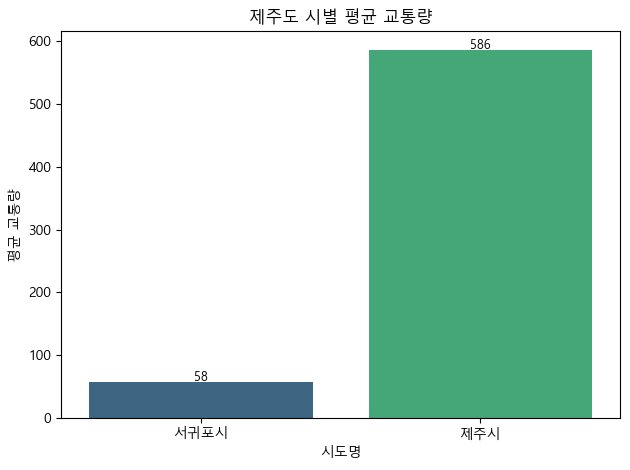

In [148]:
# 각 읍면동명의 평균 교통량 계산
traffic = df2.groupby('시도명')['교통량'].mean().reset_index()

ax = sns.barplot(data=traffic, x='시도명', y='교통량', palette='viridis')
for p in ax.patches:
    height = math.ceil(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2., height+1, height, ha = 'center', size = 9)
    
plt.xlabel('시도명')
plt.ylabel('평균 교통량')
plt.title('제주도 시별 평균 교통량')
plt.tight_layout()
plt.show()

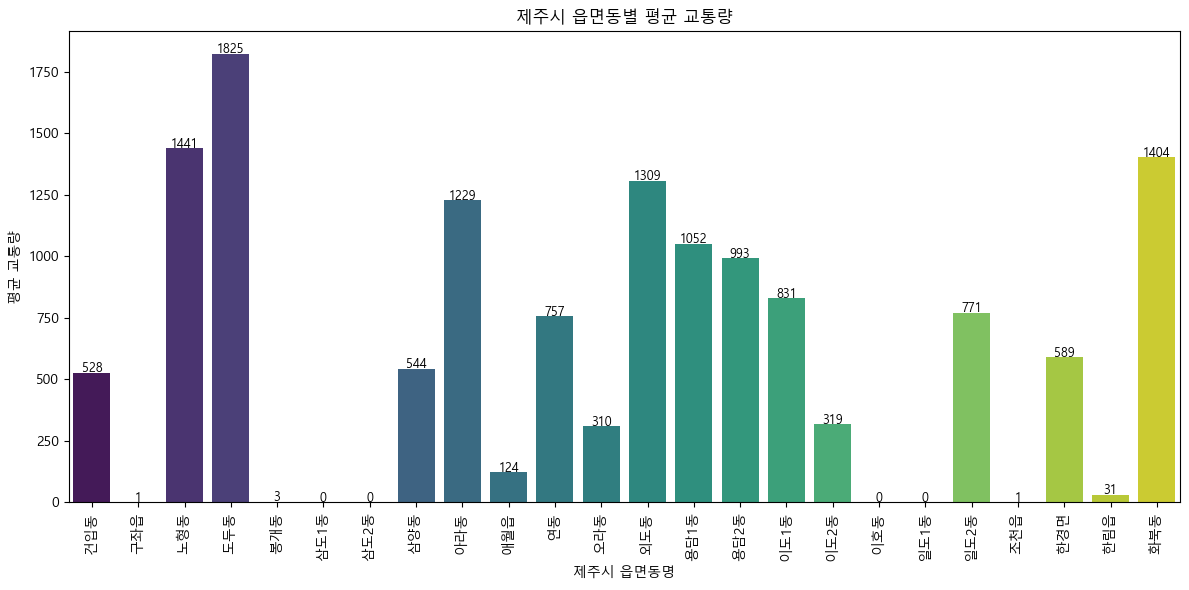

In [149]:
# 각 읍면동명의 평균 교통량 계산
mean_traffic = df.groupby('읍면동명')['교통량'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=mean_traffic, x='읍면동명', y='교통량', palette='viridis')
for p in ax.patches:
    height = math.ceil(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2., height+1, height, ha = 'center', size = 9)
    
plt.xlabel('제주시 읍면동명')
plt.ylabel('평균 교통량')
plt.title('제주시 읍면동별 평균 교통량')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

In [150]:
df['일자'] = pd.to_datetime(df['일자'])
df_2018 = df[df['일자'].dt.year == 2018]
df_2019 = df[df['일자'].dt.year == 2019]
df_2020 = df[df['일자'].dt.year == 2020]
mean_traffic_2018 = df_2018.groupby('읍면동명')['교통량'].mean().reset_index()
mean_traffic_2019 = df_2019.groupby('읍면동명')['교통량'].mean().reset_index()
mean_traffic_2020 = df_2020.groupby('읍면동명')['교통량'].mean().reset_index()

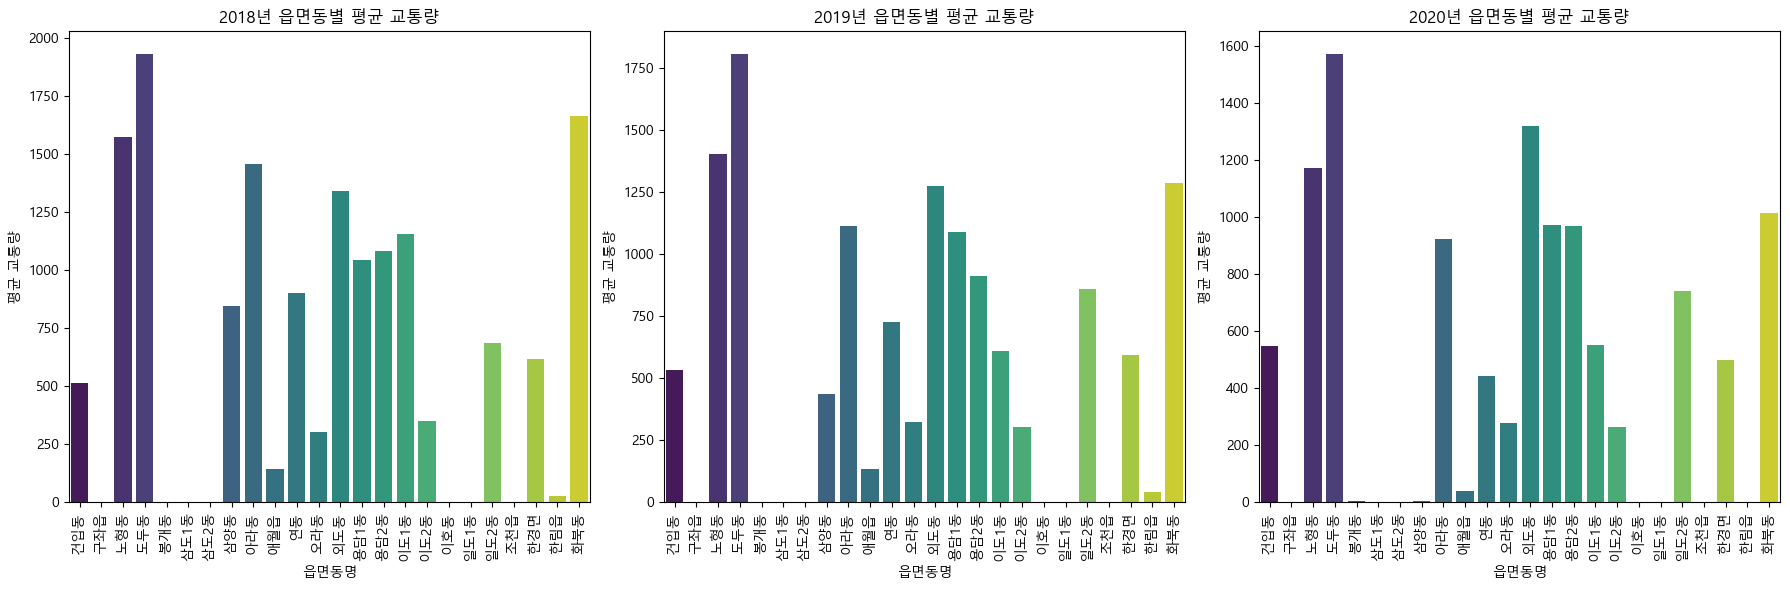

In [151]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

def year_traffic(index, data):
    sns.barplot(ax=axes[index], data=data, x='읍면동명', y='교통량', palette='viridis')
    axes[index].set_title(f'{2018+index}년 읍면동별 평균 교통량')
    axes[index].set_xlabel('읍면동명')
    axes[index].set_ylabel('평균 교통량')
    axes[index].tick_params(axis='x', rotation=90)

year_traffic(0, mean_traffic_2018)
year_traffic(1, mean_traffic_2019)
year_traffic(2, mean_traffic_2020)

plt.tight_layout()
plt.show()

In [152]:
df_dd = df[df['읍면동명'] == '도두동'] #도두동
df_gj = df[df['읍면동명'] == '구좌읍'] #구좌읍 
df3 = pd.concat([df_dd, df_gj])
# df3

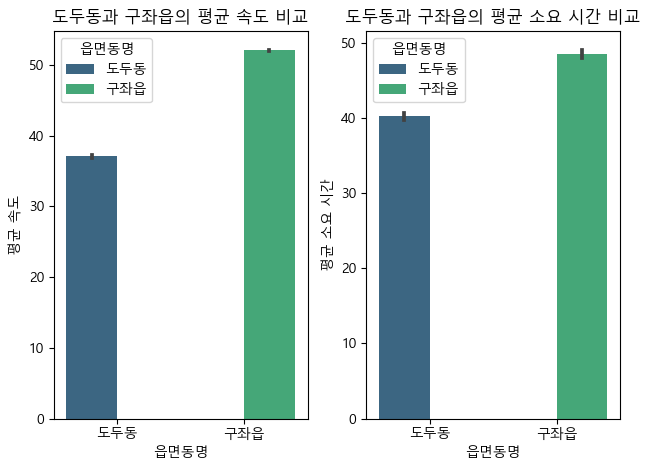

In [153]:
fig, axes = plt.subplots(nrows=1, ncols=2)

sns.barplot(ax=axes[0], data=df3, x='읍면동명', y='평균 속도', hue='읍면동명', palette='viridis')
axes[0].set_title('도두동과 구좌읍의 평균 속도 비교')
axes[0].set_xlabel('읍면동명')
axes[0].set_ylabel('평균 속도')

sns.barplot(ax=axes[1], data=df3, x='읍면동명', y='평균 소요 시간', hue='읍면동명', palette='viridis')
axes[1].set_title('도두동과 구좌읍의 평균 소요 시간 비교')
axes[1].set_xlabel('읍면동명')
axes[1].set_ylabel('평균 소요 시간')

plt.tight_layout()
plt.show()

# 도두동 면적 : 4.03k㎡
# 구좌읍 면적 : 185.93㎢

# 3. 강수량 별 교통량

In [154]:
df = pd.read_csv('jeju.csv' , encoding="cp949")

In [155]:
df1 = df[df["시도명"] == "제주시"]


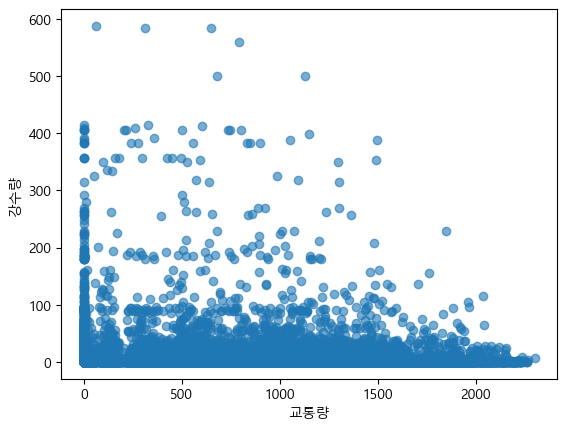

In [156]:
x = df1["교통량"]
y = df1["일강수량"]

plt.xlabel('교통량')
plt.ylabel('강수량')

plt.scatter(x, y, alpha=0.6)
plt.show()

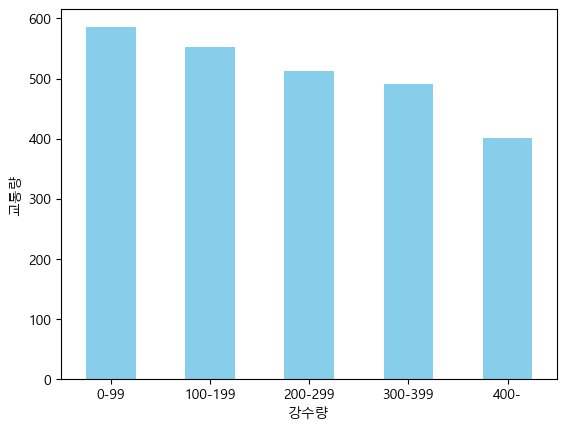

In [160]:
def categorize(volume):
    if volume < 100:
        return "0-99"
    elif volume < 200:
        return "100-199"
    elif volume < 300:
        return "200-299"
    elif volume < 400:
        return "300-399"
    else: 
        return "400-"
    # elif volume < 500:
    #     return "400-499"
    # else:
    #     return "500-"

df1['강수량_범주'] = df1['일강수량'].apply(categorize)

categories = ["0-99", "100-199", "200-299", "300-399", "400-"]

df1['강수량_범주'] = pd.Categorical(df1['강수량_범주'], categories=categories, ordered=True)

category = df1.groupby('강수량_범주')['교통량'].mean()

category.plot(kind='bar', color='skyblue')
plt.ylabel('교통량')
plt.xlabel('강수량')
plt.xticks(rotation=0)
plt.show()

# 4. 123/ 345/789/101112 별 교통량

In [161]:
df = pd.read_csv('jeju.csv' , encoding="cp949")


In [162]:
# '일자' 열을 datetime 형식으로 변환
df['일자'] = pd.to_datetime(df['일자'], format='%Y-%m-%d')

# 분기 열 추가
df['분기'] = df['일자'].dt.quarter


def get_season(month): # 계절 분류
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

# 계절 열 추가
df['계절'] = df['일자'].dt.month.apply(get_season)

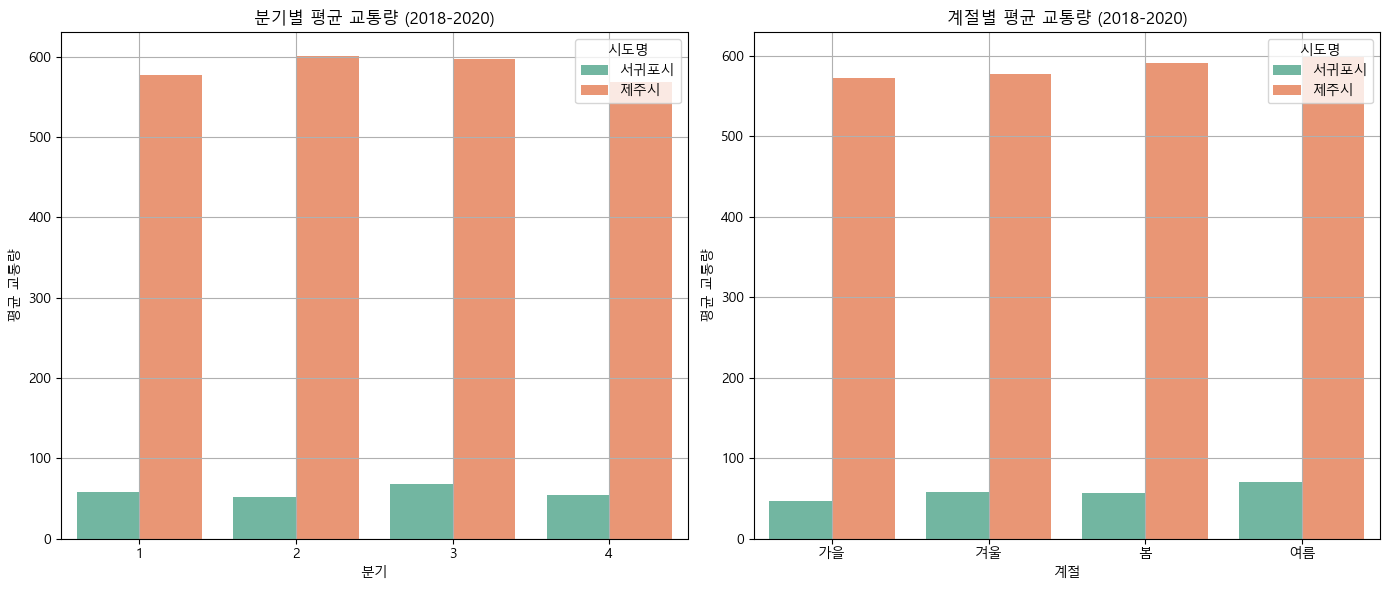

In [163]:
# 분기별 교통량 평균 계산
quarterly_traffic_avg = df.groupby(['분기', '시도명'])['교통량'].mean().reset_index()

# 계절별 교통량 평균 계산
seasonal_traffic_avg = df.groupby(['계절', '시도명'])['교통량'].mean().reset_index()

# 분기별 교통량 차트 그리기
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='분기', y='교통량', hue='시도명', data=quarterly_traffic_avg, palette='Set2')
plt.xlabel('분기')
plt.ylabel('평균 교통량')
plt.title('분기별 평균 교통량 (2018-2020)')
plt.legend(title='시도명')
plt.grid(True)

# 계절별 교통량 차트 그리기
plt.subplot(1, 2, 2)
sns.barplot(x='계절', y='교통량', hue='시도명', data=seasonal_traffic_avg, palette='Set2')
plt.xlabel('계절')
plt.ylabel('평균 교통량')
plt.title('계절별 평균 교통량 (2018-2020)')
plt.legend(title='시도명')
plt.grid(True)

plt.tight_layout()
plt.show()


In [164]:
df = df[(df['읍면동명'] == '노형동') | (df['읍면동명'] == '애월읍')]

# 결과 출력
# df

              일자  시도명 읍면동명         거주인구        근무인구        방문인구       총 유동인구  \
14443 2018-01-01  제주시  노형동  1215420.248   74964.858  445735.329  1736120.435   
14444 2018-01-02  제주시  노형동  1232528.649  137467.968  498926.734  1868923.351   
14445 2018-01-03  제주시  노형동  1227270.595  134733.507  487082.809  1849086.911   
14446 2018-01-04  제주시  노형동  1199623.796  130528.125  502313.509  1832465.430   
14447 2018-01-05  제주시  노형동  1210316.320  134131.156  502045.257  1846492.733   
...          ...  ...  ...          ...         ...         ...          ...   
20840 2020-04-26  제주시  애월읍   817853.484   54602.860  529652.147  1402108.490   
20841 2020-04-27  제주시  애월읍   785071.288   74042.345  466807.943  1325921.577   
20842 2020-04-28  제주시  애월읍   787264.458   73838.721  464417.308  1325520.487   
20843 2020-04-29  제주시  애월읍   778532.407   70981.368  480176.782  1329690.557   
20844 2020-04-30  제주시  애월읍   798288.519   57778.607  571969.339  1428036.466   

            교통량   평균 속도  평균 소요 시간  평균 기

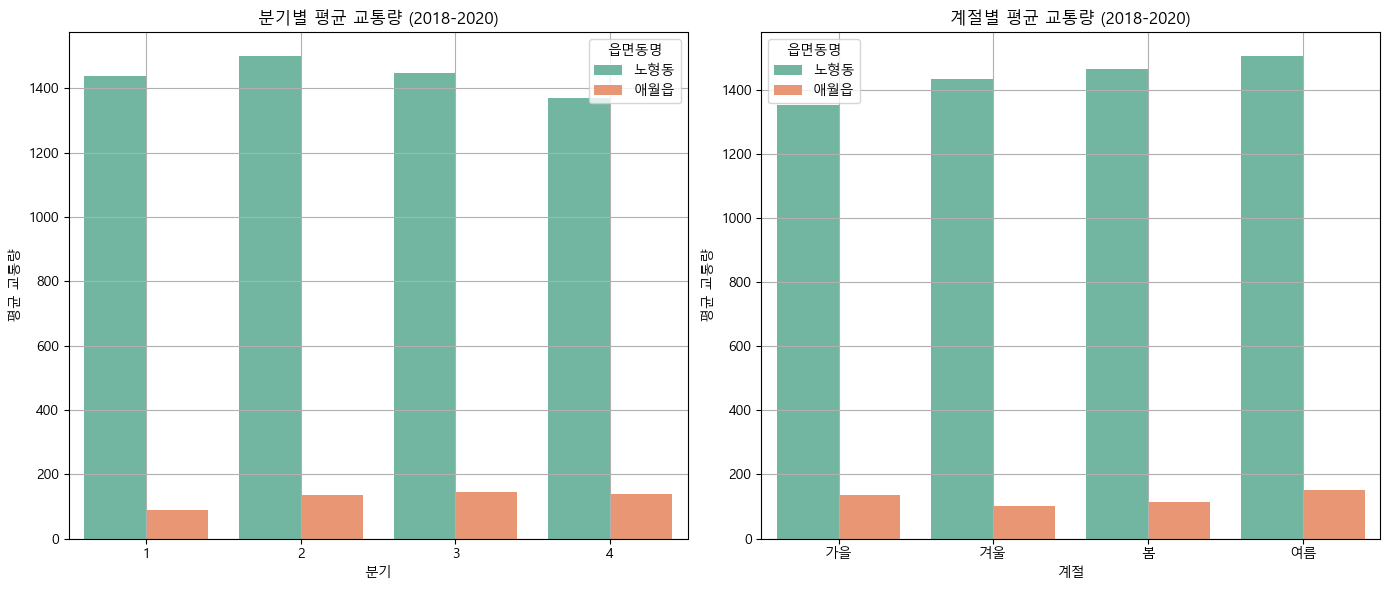

In [165]:
# '일자' 열을 datetime 형식으로 변환
df['일자'] = pd.to_datetime(df['일자'], format='%Y-%m-%d')

# 분기 값을 계산하여 새로운 열 '분기'에 저장
df['분기'] = df['일자'].dt.quarter

# 계절을 계산하는 함수 정의
def get_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

# '계절' 열 추가
df['계절'] = df['일자'].dt.month.apply(get_season)

# 결과 출력
print(df)

# 분기별 교통량 평균 계산
quarterly_traffic_avg = df.groupby(['분기', '읍면동명'])['교통량'].mean().reset_index()

# 계절별 교통량 평균 계산
seasonal_traffic_avg = df.groupby(['계절', '읍면동명'])['교통량'].mean().reset_index()

# 분기별 교통량 차트 그리기
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='분기', y='교통량', hue='읍면동명', data=quarterly_traffic_avg, palette='Set2')
plt.xlabel('분기')
plt.ylabel('평균 교통량')
plt.title('분기별 평균 교통량 (2018-2020)')
plt.legend(title='읍면동명')
plt.grid(True)

# 계절별 교통량 차트 그리기
plt.subplot(1, 2, 2)
sns.barplot(x='계절', y='교통량', hue='읍면동명', data=seasonal_traffic_avg, palette='Set2')
plt.xlabel('계절')
plt.ylabel('평균 교통량')
plt.title('계절별 평균 교통량 (2018-2020)')
plt.legend(title='읍면동명')
plt.grid(True)

plt.tight_layout()
plt.show()